匈牙利水痘病例

数据导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("hungary_chickenpox.csv")

df = df[['Date', 'BUDAPEST']].copy()

df.head()

,Date,BUDAPEST
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96
3,24/01/2005,163
4,31/01/2005,122


数据预处理

1.处理缺失值

In [2]:
print(df.isnull().sum())    # 返回每一列中的缺失值（NaN）的数量
print(df.isnull().any(axis=1))  # 返回一个布尔序列，标识每一行是否含有缺失值
print(df.iloc[105])   # 查看具体某一行的值，可以通过索引或者iloc属性来实现
print(df.iloc[106])

Date        0
BUDAPEST    0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
517    False
518    False
519    False
520    False
521    False
Length: 522, dtype: bool
Date        08/01/2007
BUDAPEST           145
Name: 105, dtype: object
Date        15/01/2007
BUDAPEST            93
Name: 106, dtype: object


2.处理日期类型

In [6]:
# 2. 数据类型转换
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# 3. 设定索引
df = df.set_index('Date')

# 4. 检查数据排序
df = df.sort_index()

df.head()

,BUDAPEST
Date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


数据分析

1.探索性数据分析（EDA）

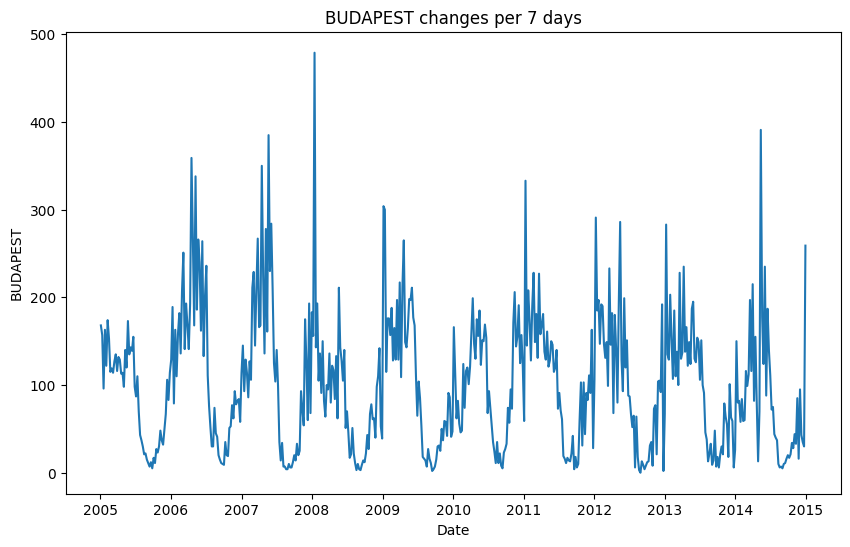

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['BUDAPEST'])
plt.xlabel('Date')
plt.ylabel('BUDAPEST')
plt.title('BUDAPEST changes per 7 days')
plt.show()

2.ADF单位根检验

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['BUDAPEST'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.933218
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


3.差分

In [9]:
# 首先导入了所需要的库和函数
from statsmodels.tsa.stattools import adfuller

# 定义一个名为calculate_diff的函数，接收三个参数：df是要处理的DataFrame，max_diff是最大的差分步数，significance_level是判定平稳性的显著性水平
def calculate_diff(df, max_diff, significance_level=0.05):
    # 初始化最佳差分阶数和最小p值
    best_diff = None
    min_pvalue = 1.0
    min_variance = float('inf')  # 初始化最小方差
    min_adf_stat = float('inf')  # 初始化最小ADF统计量

    # 原数据
    # 对数据进行ADF单位根检验
    result = adfuller(df)
    # 打印出差分阶数，ADF统计量，p值，标准差和方差
    print('原数据')
    print('ADF统计量: %f' % result[0])
    print('p值: %.10e' % result[1])  
    print('标准差: %f' % df.std())
    print('方差: %f' % df.var())

    # 判断p值是否小于显著性水平，如果小于则认为差分后的数据可能是平稳的
    if result[1] < significance_level:
        print('=> 根据这个差分阶数，序列可能是平稳的')
        # 判断当前的p值是否小于最小p值，如果小于则更新最小p值和最佳差分阶数
        if result[1] < min_pvalue:
            min_pvalue = result[1]
            best_diff = 0
            min_variance = df.var()  # 更新最小方差
            min_adf_stat = result[0]  # 更新最小ADF统计量
    else:
        print('=> 根据这个差分阶数，序列可能是非平稳的')
    print('--------------------------------')

    # 循环，差分阶数从1到max_diff
    for i in range(1, max_diff+1):
        # 对数据进行差分，并去除NA值
        df_diff = df['BUDAPEST'].diff(i).dropna()  
        # 对差分后的数据进行ADF单位根检验
        result = adfuller(df_diff)
        # 打印出差分阶数，ADF统计量，p值，标准差和方差
        print(f'{i}步差分')
        print('ADF统计量: %f' % result[0])
        print('p值: %.10e' % result[1])  
        print('标准差: %f' % df_diff.std())
        print('方差: %f' % df_diff.var())

        # 判断p值是否小于显著性水平，如果小于则认为差分后的数据可能是平稳的
        if result[1] < significance_level:
            print('=> 根据这个差分阶数，序列可能是平稳的')
            # 判断当前的p值是否小于最小p值，如果小于则更新最小p值和最佳差分阶数
            if result[1] < min_pvalue:
                min_pvalue = result[1]
                best_diff = i
                min_variance = df_diff.var()  # 更新最小方差
                min_adf_stat = result[0]  # 更新最小ADF统计量
        else:
            print('=> 根据这个差分阶数，序列可能是非平稳的')
        print('--------------------------------')

    # 如果找到了使数据平稳的差分阶数，打印出最佳差分阶数和其对应的p值
    if best_diff is not None:
        print(f'最佳差分阶数是: {best_diff}，p值为: {min_pvalue}，方差为: {min_variance}，ADF统计量为: {min_adf_stat}')

# 使用函数对数据进行差分并测试其平稳性
calculate_diff(df, max_diff=24)

原数据
ADF统计量: -6.933218
p值: 1.0708269235e-09
标准差: 76.354872
方差: 5830.066436
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
1步差分
ADF统计量: -19.317661
p值: 0.0000000000e+00
标准差: 64.648950
方差: 4179.486741
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
2步差分
ADF统计量: -7.176014
p值: 2.7261184088e-10
标准差: 65.227474
方差: 4254.623329
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
3步差分
ADF统计量: -7.333550
p值: 1.1116296193e-10
标准差: 65.642016
方差: 4308.874268
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
4步差分
ADF统计量: -6.353915
p值: 2.5705922004e-08
标准差: 70.843114
方差: 5018.746798
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
5步差分
ADF统计量: -6.346624
p值: 2.6731169445e-08
标准差: 76.018725
方差: 5778.846596
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
6步差分
ADF统计量: -6.555121
p值: 8.6550873979e-09
标准差: 77.911611
方差: 6070.219056
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
7步差分
ADF统计量: -5.850943
p值: 3.5906373530e-07
标准差: 84.454775
方差: 7132.609082
=> 根据这个差分阶数，序列可能是平稳的
-

C:\Users\BeiFeng\AppData\Local\Temp\ipykernel_17324\2609927996.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('标准差: %f' % df.std())
C:\Users\BeiFeng\AppData\Local\Temp\ipykernel_17324\2609927996.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('方差: %f' % df.var())


17步差分
ADF统计量: -5.264480
p值: 6.4837459859e-06
标准差: 121.218636
方差: 14693.957606
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
18步差分
ADF统计量: -6.664563
p值: 4.7535290239e-09
标准差: 122.016792
方差: 14888.097601
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
19步差分
ADF统计量: -8.882286
p值: 1.3081129101e-14
标准差: 125.133758
方差: 15658.457280
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
20步差分
ADF统计量: -8.466727
p值: 1.5154607285e-13
标准差: 127.254372
方差: 16193.675311
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
21步差分
ADF统计量: -8.312797
p值: 3.7494428734e-13
标准差: 128.330276
方差: 16468.659617
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
22步差分
ADF统计量: -7.275094
p值: 1.5519074392e-10
标准差: 129.506817
方差: 16772.015627
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
23步差分
ADF统计量: -8.585268
p值: 7.5371258556e-14
标准差: 130.540427
方差: 17040.803157
=> 根据这个差分阶数，序列可能是平稳的
--------------------------------
24步差分
ADF统计量: -8.579510
p值: 7.7973160690e-14
标准差: 131.702353
方差: 17345.50980

4.绘制差分后图像

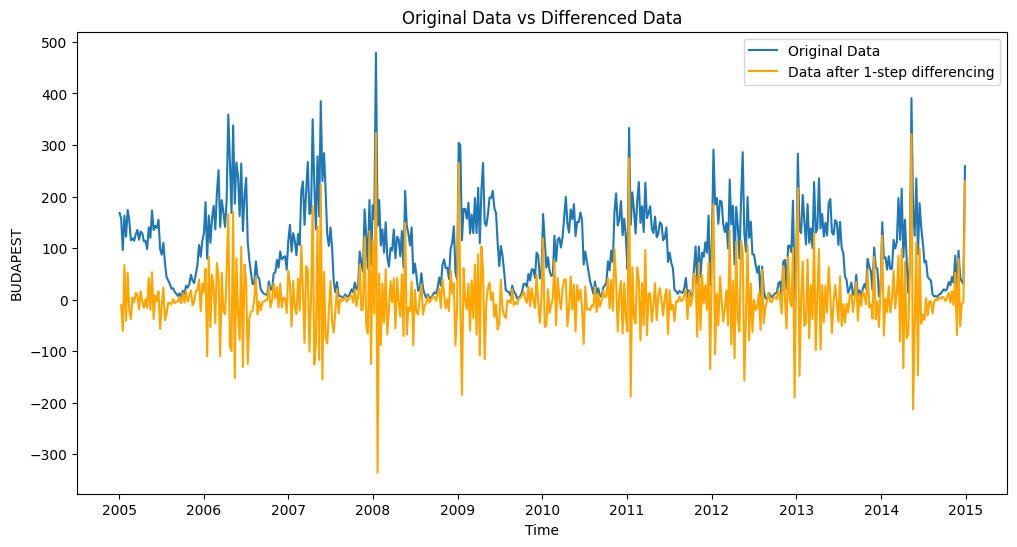

In [10]:
import matplotlib.pyplot as plt

# 设置1步差分
diff_steps = 1
df_diff = df['BUDAPEST'].diff(diff_steps).dropna()

plt.figure(figsize=(12,6))

# 绘制原始数据
plt.plot(df['BUDAPEST'], label='Original Data')

# 绘制1步差分后的数据
plt.plot(df_diff, label=f'Data after {diff_steps}-step differencing', color='orange')

# 设置标题和标签
plt.title('Original Data vs Differenced Data')
plt.xlabel('Time')
plt.ylabel('BUDAPEST')

plt.legend()

plt.show()

In [12]:
df['BUDAPEST_Diff_1'] = df['BUDAPEST'].diff(1)

模型选择

1.分析ACF和PACF

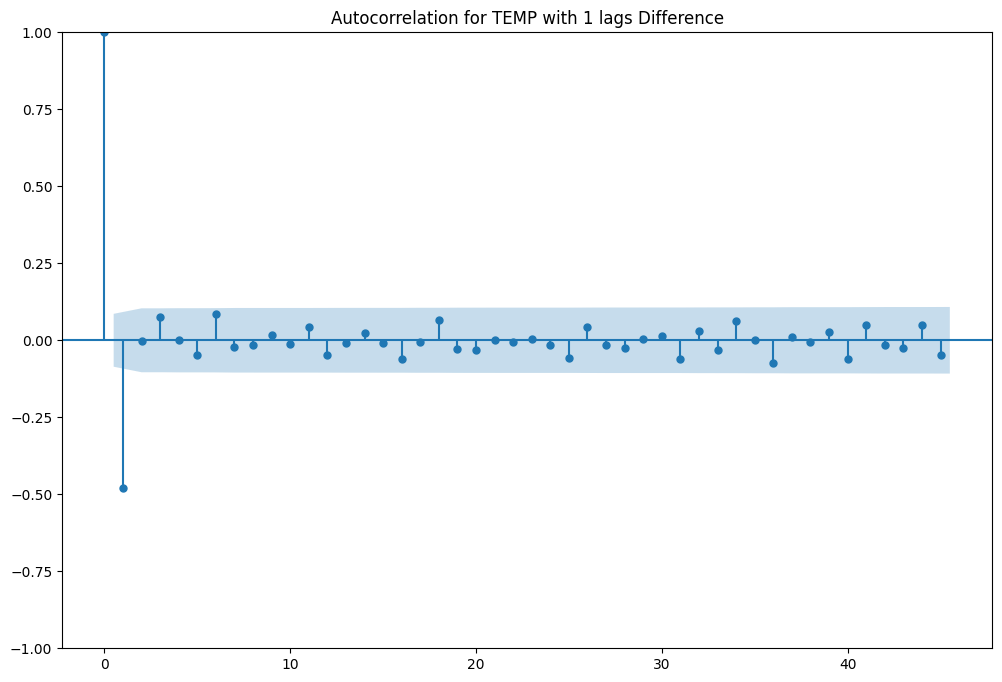

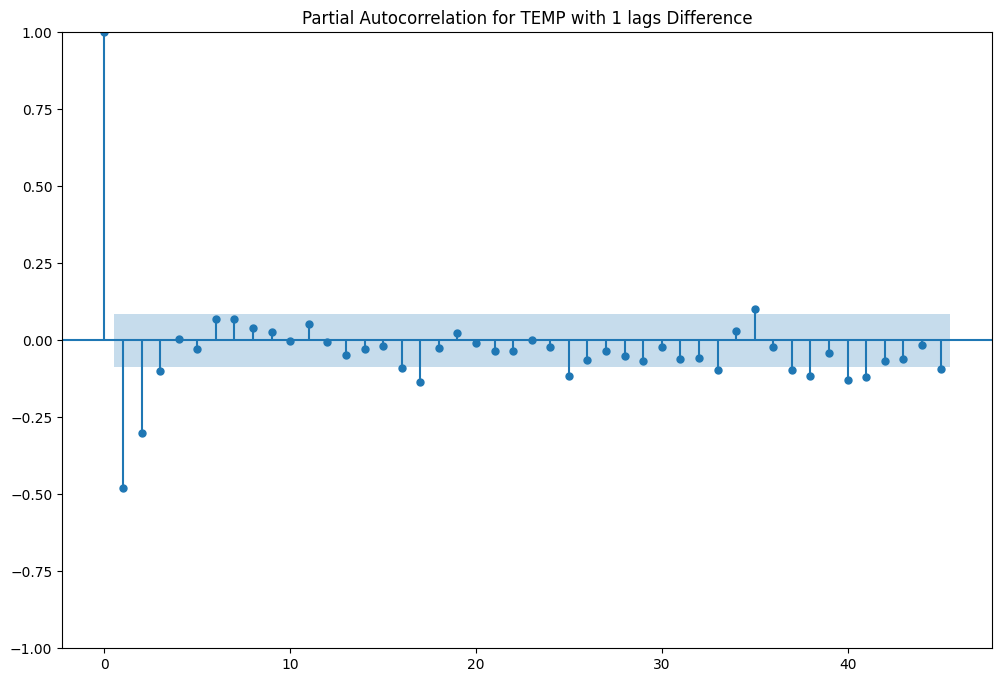

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制ACF图
plt.figure(figsize=(12,8))
plot_acf(df['BUDAPEST_Diff_1'].dropna(), lags=45, ax=plt.gca())
plt.title('Autocorrelation for TEMP with 1 lags Difference')
plt.show()

# 绘制PACF图
plt.figure(figsize=(12,8))
plot_pacf(df['BUDAPEST_Diff_1'].dropna(), lags=45, ax=plt.gca())
plt.title('Partial Autocorrelation for TEMP with 1 lags Difference')
plt.show()

2.使用多阶差分计算d值

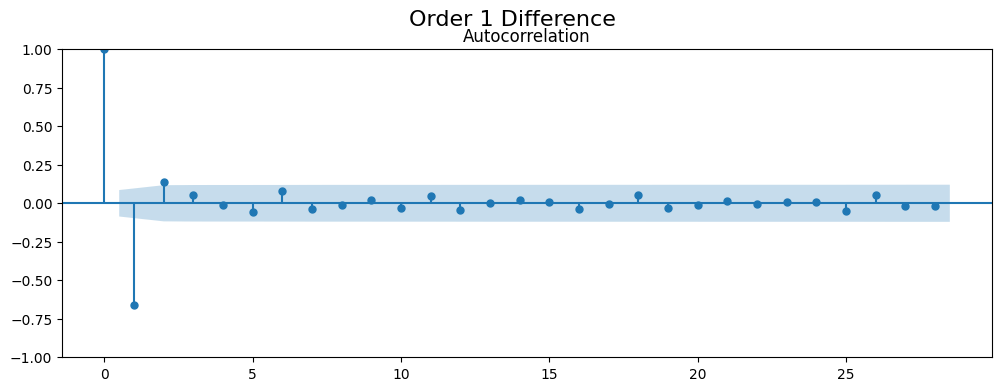

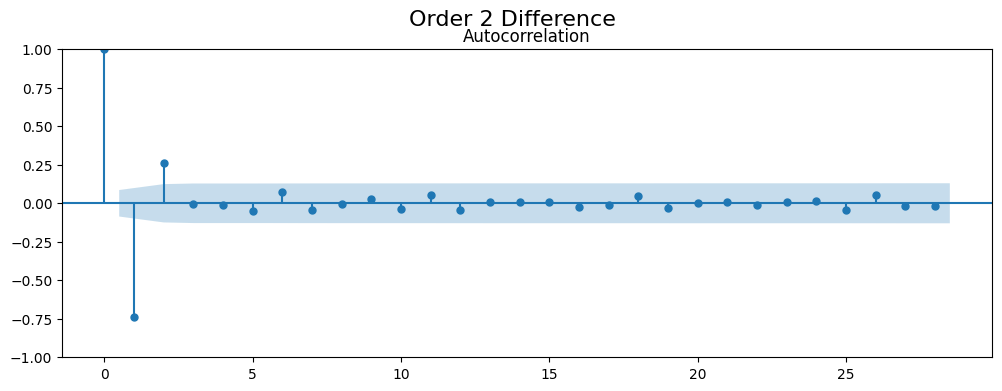

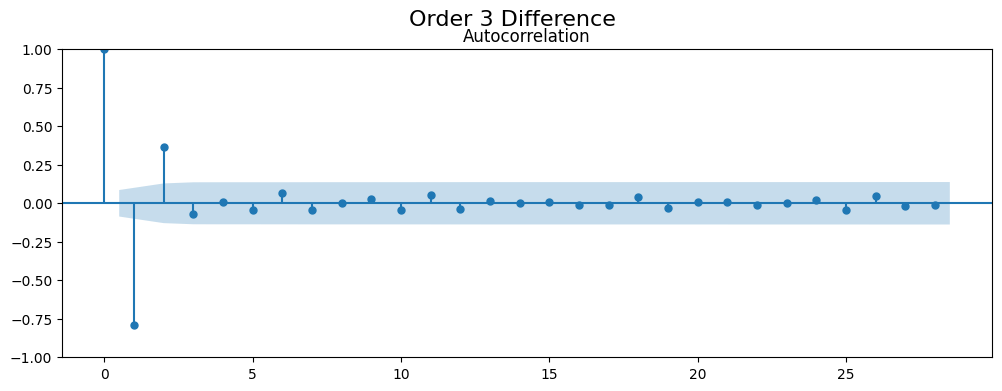

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

def diff(data, order):
    if order == 0:
        return data
    else:
        return diff(data.diff().dropna(), order - 1)

# 循环不同的d值
for d in range(1, 4):
    # 创建新的图形
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Order {d} Difference', fontsize=16)

    # 绘制ACF图
    plot_acf(diff(df['BUDAPEST_Diff_1'], d), ax=plt.gca(), title='Autocorrelation')
    plt.show()

ARIMA模型实现

1.设置时间索引

In [15]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df.index

DatetimeIndex(['2005-01-03', '2005-01-10', '2005-01-17', '2005-01-24',
               '2005-01-31', '2005-02-07', '2005-02-14', '2005-02-21',
               '2005-02-28', '2005-03-07',
               ...
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01', '2014-12-08', '2014-12-15',
               '2014-12-22', '2014-12-29'],
              dtype='datetime64[ns]', length=522, freq='W-MON')

2.获取不同p、d、q组合

In [16]:
import itertools
#定义p, d和q参数，取0到4之间的任意值
p = q = range(0, 4)

# 生成p, d和q三元组的所有不同组合
pdq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

3.超参数搜索

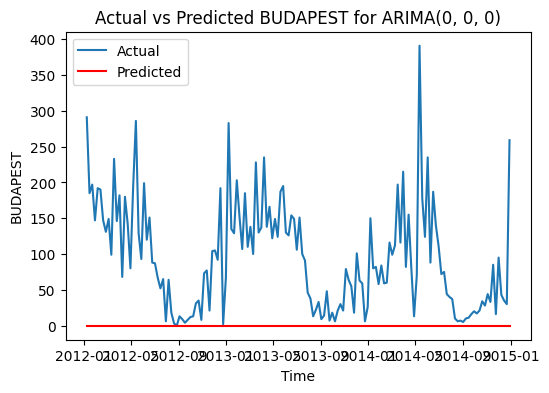

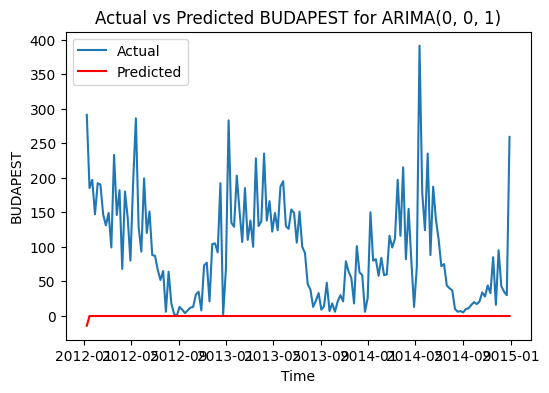

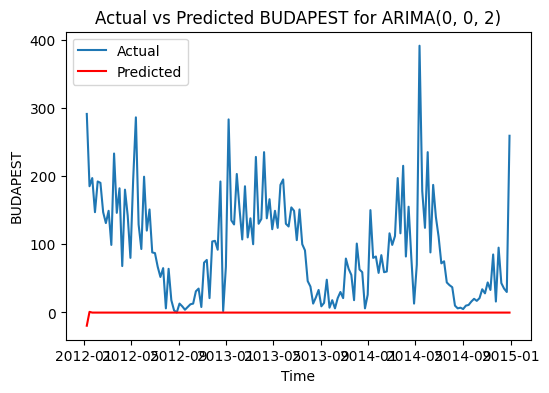

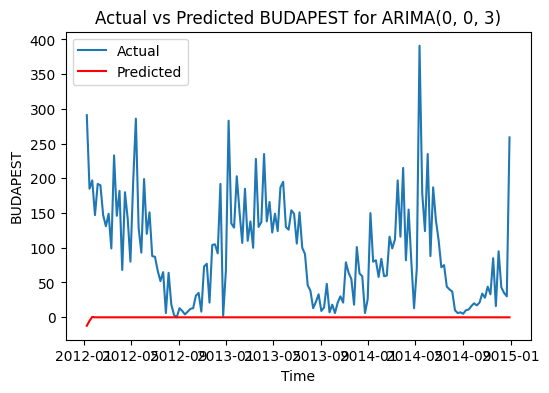

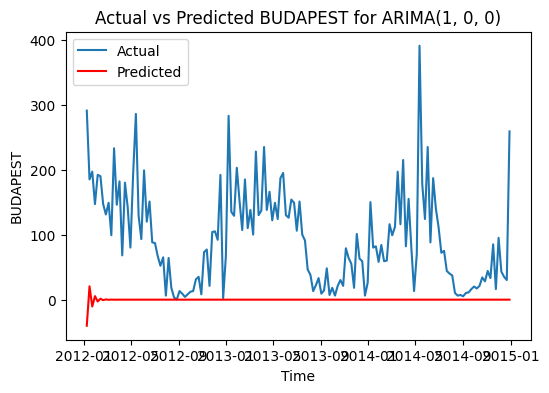

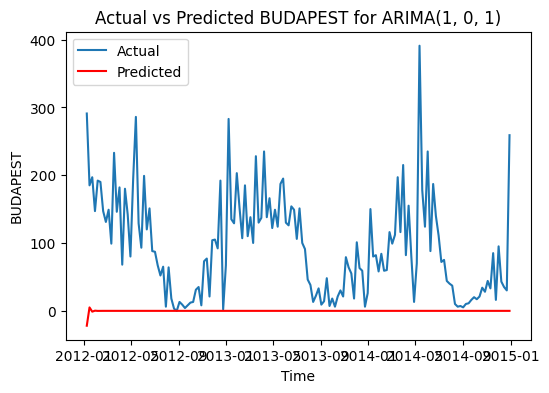

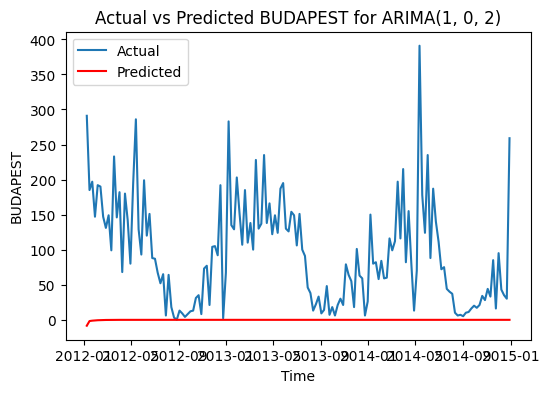

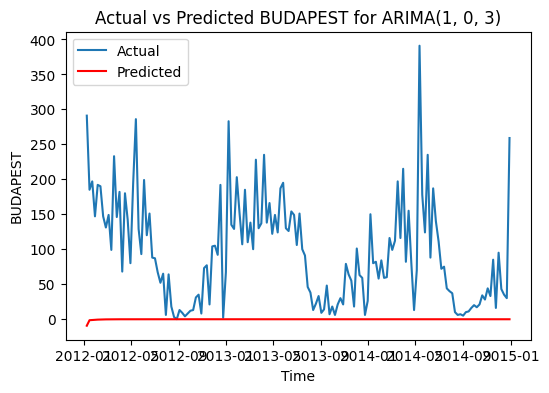

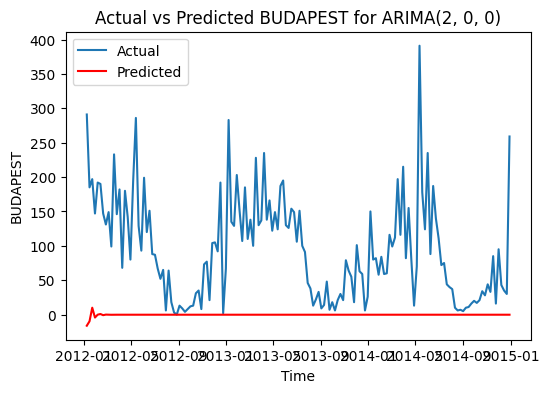

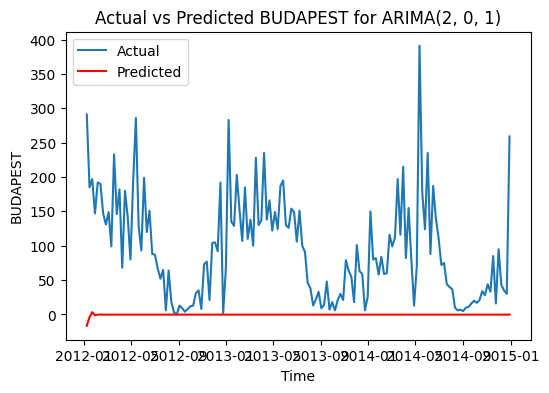

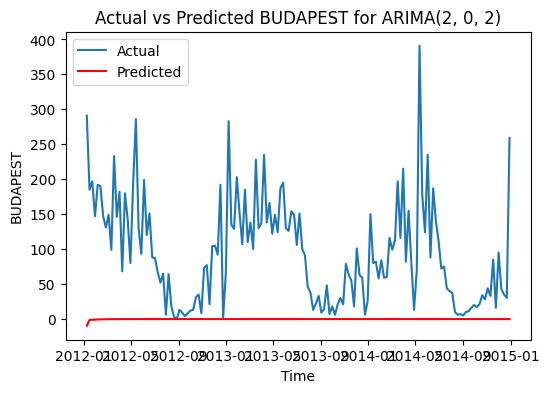

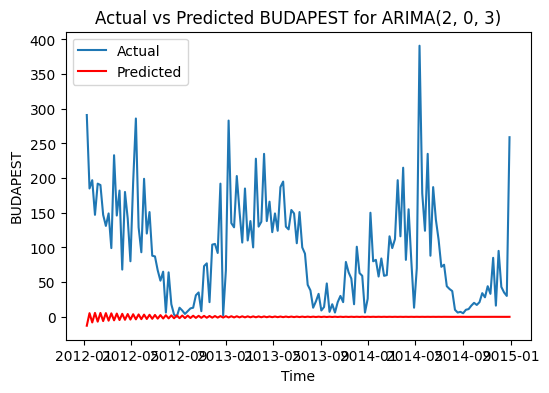

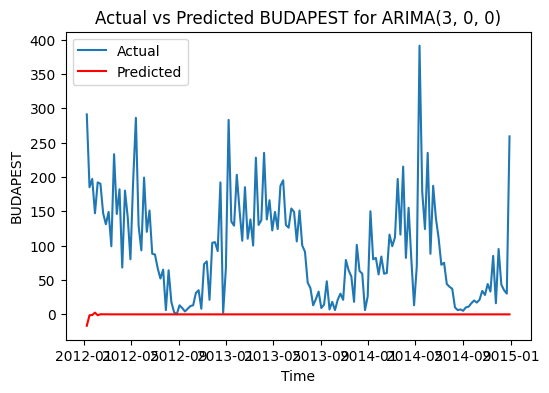

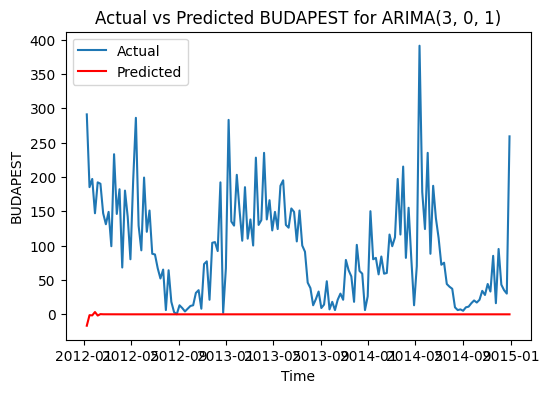

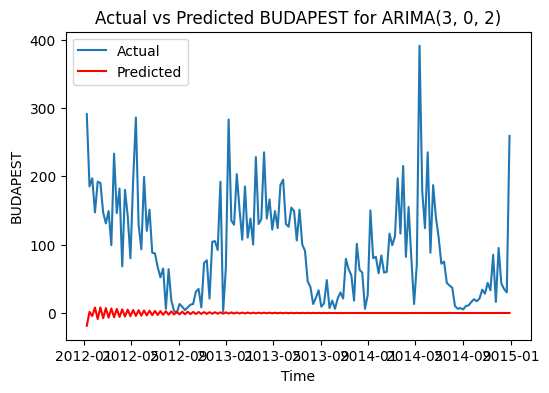

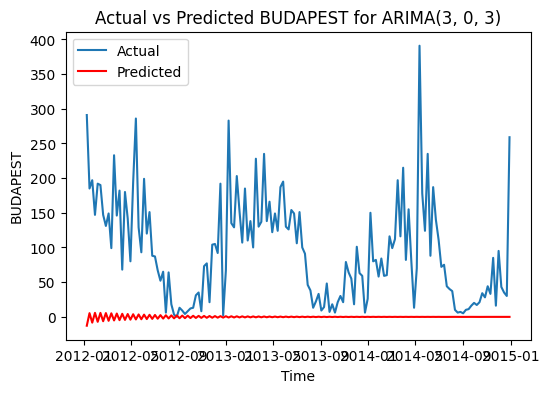

The best model is ARIMA(0, 0, 0), MSE = 5104.817185458821
                               SARIMAX Results                                
Dep. Variable:        BUDAPEST_Diff_1   No. Observations:                  366
Model:                          ARIMA   Log Likelihood               -2020.901
Date:                Sat, 24 Feb 2024   AIC                           4045.802
Time:                        23:19:20   BIC                           4053.607
Sample:                    01-03-2005   HQIC                          4048.903
                         - 01-02-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1699      3.253     -0.052      0.958      -6.545       6.205
sigma2      3773.5177    137.090     27.526      0.000    3504.826    404

In [17]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import itertools

#定义p, d和q参数，取0到4之间的任意值
p = q = range(0, 4)

# 生成p, d和q三元组的所有不同组合
pdq = [(x[0], 0, x[1]) for x in list(itertools.product(p, q))]


# 将数据分为训练集和测试集
train_data = df['BUDAPEST_Diff_1'].iloc[:366]
test_data = df['BUDAPEST_Diff_1'].iloc[366:]


# 初始化最佳模型及其参数和MSE值
best_model = None
best_param = None
best_mse = float('inf')

# 对每一种参数组合进行迭代
for param in pdq:
    try:
        # 实例化ARIMA模型
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()

        # 进行预测
        predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # 计算MSE
        mse = mean_squared_error(test_data, predictions)

        # 如果当前模型的MSE比最佳MSE小，更新最佳模型、参数和MSE
        if mse < best_mse:
            best_model = model_fit
            best_param = param
            best_mse = mse

        # 绘制真实值和预测值
        plt.figure(figsize=(6, 4))
        plt.plot(df.index[366:], df['BUDAPEST'].iloc[366:], label='Actual')
        plt.plot(df.index[366:], predictions, color='red', label='Predicted')

        # 添加标题和标签
        plt.title('Actual vs Predicted BUDAPEST for ARIMA{}'.format(param))
        plt.xlabel('Time')
        plt.ylabel('BUDAPEST')
        plt.legend()

        # 显示图形
        plt.show()

    except Exception as e:
        print('Error:', e)
        continue

# 打印出最优模型的参数及其MSE
print(f'The best model is ARIMA{best_param}, MSE = {best_mse}')

# 打印最优模型的摘要
print(best_model.summary(alpha=0.05))

SARIMA模型实现

ARIMA(0, 1, 0, 12) - AIC:4325.887938993906


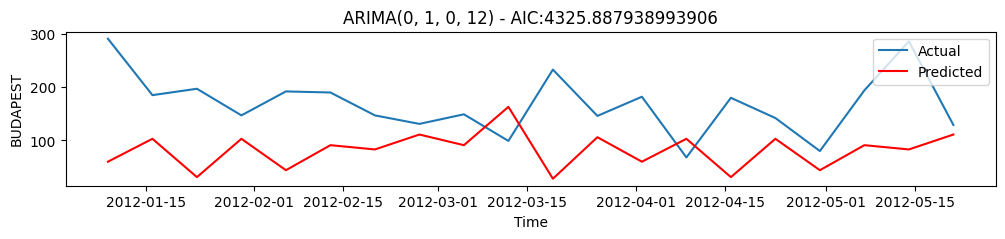

ARIMA(0, 1, 1, 12) - AIC:4135.2127500727765


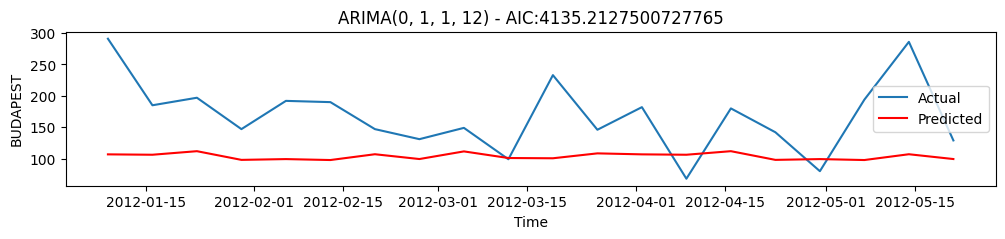

ARIMA(0, 1, 2, 12) - AIC:4132.7274350920125


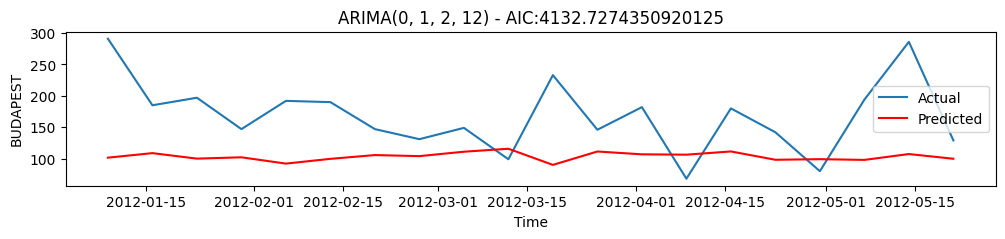

ARIMA(1, 1, 0, 12) - AIC:4305.243270279407


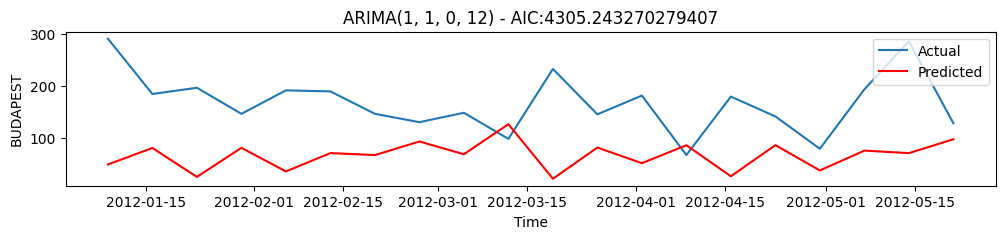

ARIMA(1, 1, 1, 12) - AIC:4136.09288588325


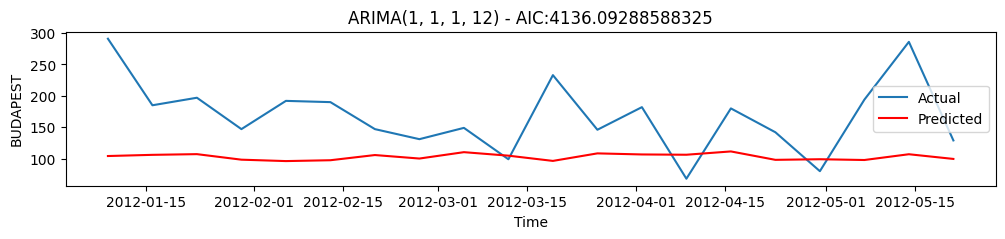

ARIMA(1, 1, 2, 12) - AIC:4118.611388851823


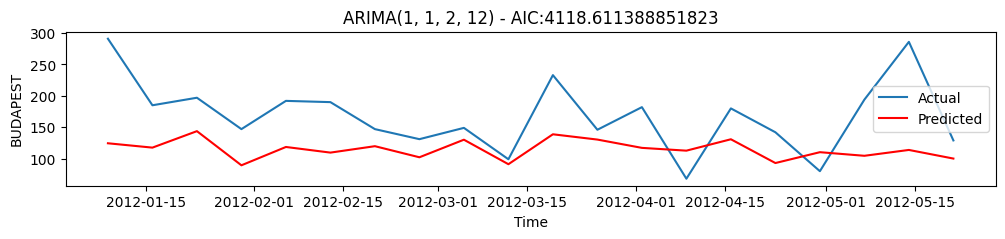

ARIMA(2, 1, 0, 12) - AIC:4231.159341588021


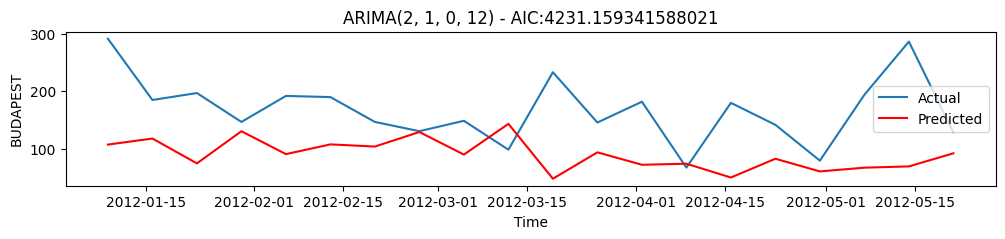

ARIMA(2, 1, 1, 12) - AIC:4059.746357166653


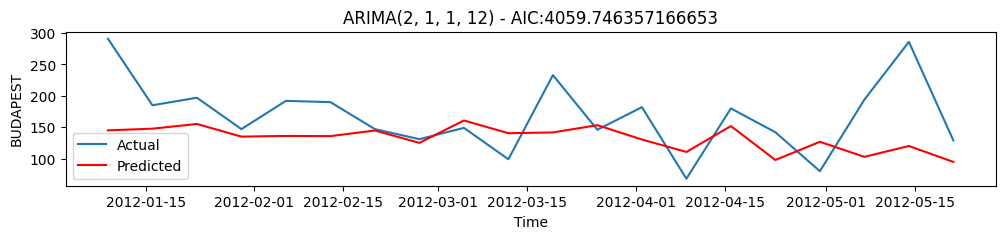

ARIMA(2, 1, 2, 12) - AIC:4048.929677481684


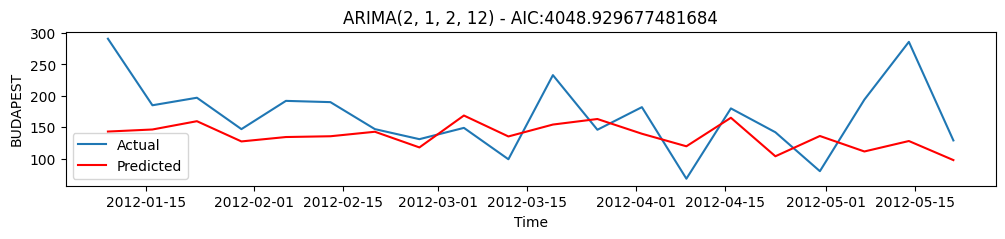


The best model is ARIMA(2, 1, 2, 12), AIC = 4048.929677481684
                                  SARIMAX Results                                  
Dep. Variable:                    BUDAPEST   No. Observations:                  366
Model:             ARIMA(2, 1, [1, 2], 12)   Log Likelihood               -2019.465
Date:                     Sat, 24 Feb 2024   AIC                           4048.930
Time:                             23:21:58   BIC                           4068.276
Sample:                         01-03-2005   HQIC                          4056.627
                              - 01-02-2012                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
ar.S.L12       0.2599      0.091      2.849      0.004       0.025       0.495
ar.S.L24      -0.4760      0

In [19]:
import warnings
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  
import itertools

# 定义季节性参数 P 和 Q，取0到2之间的任意值
P = Q = range(0, 3)  # D固定为1
s = 12  # 季节性周期，这里设置为12，表示年度季节性

# 生成P和Q的组合，并创建季节性参数列表
seasonal_pdq = [(x[0], 1, x[1], s) for x in list(itertools.product(P, Q))]


# 将数据分为训练集和测试集
train_data = df['BUDAPEST'][:366]  
test_data = df['BUDAPEST'].iloc[366:]  

best_model = None  # 初始化最优模型
best_seasonal_param = None  # 初始化最优季节性参数
best_aic = float('inf')  # 初始化最优模型的AIC值，初始值设置为无穷大

# 对所有的季节性参数组合进行遍历
for seasonal_param in seasonal_pdq:
    try:
        # 建立季节性ARIMA模型
        model = ARIMA(endog = train_data, seasonal_order=seasonal_param)  
        model_fit = model.fit()  # 拟合模型

        aic = model_fit.aic  # 获取当前模型的AIC值

        # 如果当前模型的AIC小于最优AIC，则更新最优模型、最优季节性参数和最优AIC
        if aic < best_aic:
            best_model = model_fit
            best_seasonal_param = seasonal_param
            best_aic = aic

        print(f'ARIMA{seasonal_param} - AIC:{aic}')

        # 生成预测结果的开始时间和结束时间
        start = len(train_data)
        end = start + len(test_data) - 1

        # 使用当前模型进行预测
        predictions = model_fit.predict(start=start, end=end, dynamic=True)

        # 画图展示真实值和预测值
        plt.figure(figsize=(12, 2))
        plt.plot(df.index[366:386], df['BUDAPEST'].iloc[366:386], label='Actual')
        plt.plot(df.index[366:386], predictions.iloc[:20], color='red', label='Predicted')

        plt.title(f'ARIMA{seasonal_param} - AIC:{aic}')
        plt.xlabel('Time')
        plt.ylabel('BUDAPEST')
        plt.legend()

        plt.show()

    except Exception as e:
        # 如果建立模型或者拟合模型出错，打印出错误信息
        print('Error:', e)
        continue

# 打印出最优模型的季节性参数和AIC
print(f'\nThe best model is ARIMA{best_seasonal_param}, AIC = {best_aic}')

# 打印最优模型的摘要信息
print(best_model.summary(alpha=0.01))

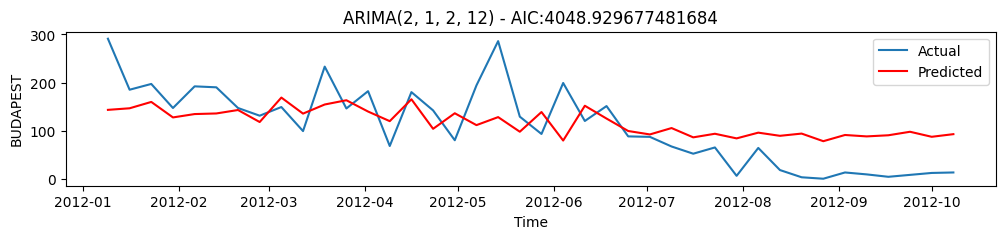

In [20]:
model = ARIMA(endog = train_data, seasonal_order=(2,1,2,12))  
model_fit = model.fit()  # 拟合模型

# 生成预测结果的开始时间和结束时间
start = len(train_data)
end = start + len(test_data) - 1

# 使用当前模型进行预测
predictions = model_fit.predict(start=start, end=end, dynamic=True)

# 画图展示真实值和预测值
plt.figure(figsize=(12, 2))
plt.plot(df.index[366:406], df['BUDAPEST'].iloc[366:406], label='Actual')
plt.plot(df.index[366:406], predictions.iloc[:40], color='red', label='Predicted')

plt.title(f'ARIMA{seasonal_param} - AIC:{aic}')
plt.xlabel('Time')
plt.ylabel('BUDAPEST')
plt.legend()

plt.show()

In [23]:
# 创建一个新的DataFrame来存储真实值和预测值
comparison_df = pd.DataFrame({'Actual': df['BUDAPEST_Diff_1'].iloc[366:], 'Predicted': predictions})

# 打印比对结果
print(comparison_df.head(20))

            Actual   Predicted
2012-01-09   185.0  143.128298
2012-01-16  -106.0  146.415570
2012-01-23    12.0  159.629076
2012-01-30   -50.0  127.408765
2012-02-06    45.0  134.402351
2012-02-13    -2.0  135.650641
2012-02-20   -43.0  142.816432
2012-02-27   -16.0  117.848557
2012-03-05    18.0  168.672488
2012-03-12   -50.0  135.332678
2012-03-19   134.0  154.278103
2012-03-26   -87.0  163.117667
2012-04-02    36.0  139.645284
2012-04-09  -114.0  119.665716
2012-04-16   112.0  165.113648
2012-04-23   -38.0  103.755235
2012-04-30   -62.0  136.062296
2012-05-07   114.0  111.401702
2012-05-14    92.0  128.056020
2012-05-21  -157.0   97.686098


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 计算均方误差
mse = mean_squared_error(df['BUDAPEST_Diff_1'].iloc[366:], predictions)
print("Mean Squared Error (MSE):", mse)

# 计算平均绝对误差
mae = mean_absolute_error(df['BUDAPEST_Diff_1'].iloc[366:], predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算均方根误差
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 16725.347717277167
Mean Absolute Error (MAE): 113.91368966078363
Root Mean Squared Error (RMSE): 129.32651590944977
